In [82]:
from sklearn import tree
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplolib inline
from sklearn.tree import plot_tree


UsageError: Line magic function `%matplolib` not found.


In [83]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [84]:
from IPython.display import HTML
style ="<style>svg{width^70% !imoprtant;height:70% !important;}</style>"
HTML(style)

In [85]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [86]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [87]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [88]:
clf

DecisionTreeClassifier(criterion='entropy')

In [89]:
X = data[['X_1', 'X_2']]
y = data.Y

In [90]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

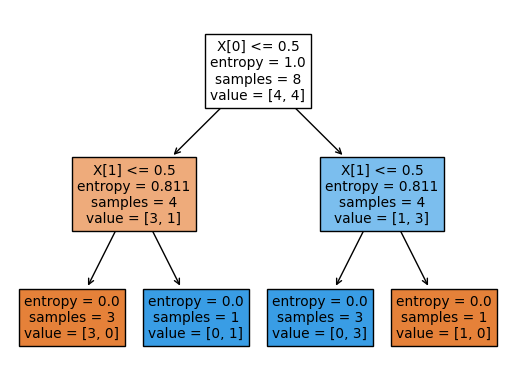

In [91]:
tree.plot_tree(clf,filled=True); 

In [92]:
# Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - 
#отметьте все верные утверждения о данном датафрэйме

In [93]:
dog_cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv')

In [94]:
dog_cat

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


In [95]:
# Переменная Лазает по деревьям позволяет идеально различить 2 вида по исходным данным

# Обе переменные Гавкает и Лазает по деревьям дают одинаковый Information Gain, если поместить их в вершину дерева

# Для различения котиков от собачек, по этим данным, хватит всего 1-ой переменной

# Переменная Гавкает позволяет идеально различить 2 вида по исходным данным

In [96]:
# В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, 
# формализуемость разделения на группы.

In [97]:
cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

In [98]:
cat

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [99]:
# Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 
# (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

In [100]:
import math

In [101]:
E_sh_sob=(1/1)*math.log2((1/1)) - 0
E_sh_kot=-(4/9)*math.log2((4/9)) - (5/9)*math.log2((5/9))
E_gav_sob=0 - (5/5)*math.log2((5/5))
E_gav_kot=-(4/5)*math.log2((4/5)) - (1/5)*math.log2((1/5))
E_laz_sob= (4/4)*math.log2((4/4)) - 0 
E_laz_kot=0 - (6/6)*math.log2((6/6))

In [102]:
E_sh_sob

0.0

In [103]:
E_sh_kot

0.9910760598382222

In [104]:
E_gav_sob

0.0

In [105]:
E_gav_kot

0.7219280948873623

In [106]:
E_laz_sob


0.0

In [107]:
E_laz_kot

0.0

In [108]:
from scipy.stats import entropy

def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))

Шерстист на 0:  0.0
Шерстист на 1:  0.9910760598382222
Гавкает на 0:  0.0
Гавкает на 1:  0.7219280948873623
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0


In [109]:
# Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые 
# до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании 
# является точка.
# По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

In [110]:
E = -(4/10)*math.log2((4/10)) - (6/10)*math.log2((6/10))

In [111]:
E

0.9709505944546686

In [112]:
IG_sh = E - ((1/10)*E_sh_sob + (9/10)*E_sh_kot)
IG_gav = E - ((5/10)*E_gav_sob + (5/10)*E_gav_kot)
IG_laz = E - ((6/10)*E_laz_sob + (6/10)*E_laz_kot)

In [113]:
round(IG_sh, 2)

0.08

In [114]:
round(IG_gav, 2)

0.61

In [115]:
IG_laz

0.9709505944546686

In [116]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')

In [117]:
X = cat[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cat.Вид

In [118]:
clf1.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

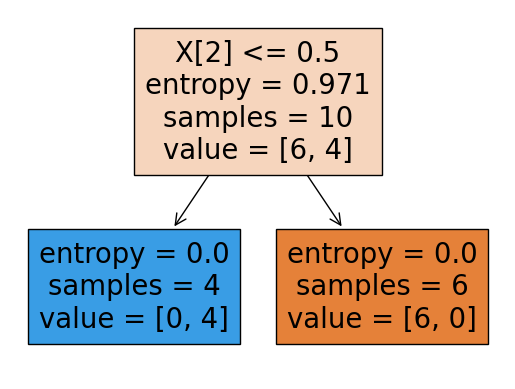

In [119]:
tree.plot_tree(clf1,filled=True); 

In [120]:
def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
  ent0 = ent(data[data[feature] == 0])
  ent1 = ent(data[data[feature] == 1])
  n = len(data)
  n0 = len(data[data[feature] == 0])
  n1 = len(data[data[feature] == 1])
  return round(ent(data) - ent0 * n0 / n - ent1 * n1 / n, 2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)

print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))

IG по шертистости:  0.08
IG по голосу:  0.61
IG по деревьям:  0.97


In [121]:
# Load train data
titanik_data = pd.read_csv('train.csv')

In [122]:
# Look
titanik_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
# Find NaN
# Determine the sum of missing values by columns
titanik_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
# Remove redundant data that will not be used to build the model
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [125]:
# Let us replace the unknown values of age with its median value
X = X.fillna({'Age' : X.Age.median()})

In [126]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [127]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [128]:
# Get rid of string values, convert them to numbers
X = pd.get_dummies(X)

In [129]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [130]:
# Define the variable to be predicted
y = titanik_data.Survived

In [131]:
# Let's create a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [132]:
#Train the model
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [133]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin' 

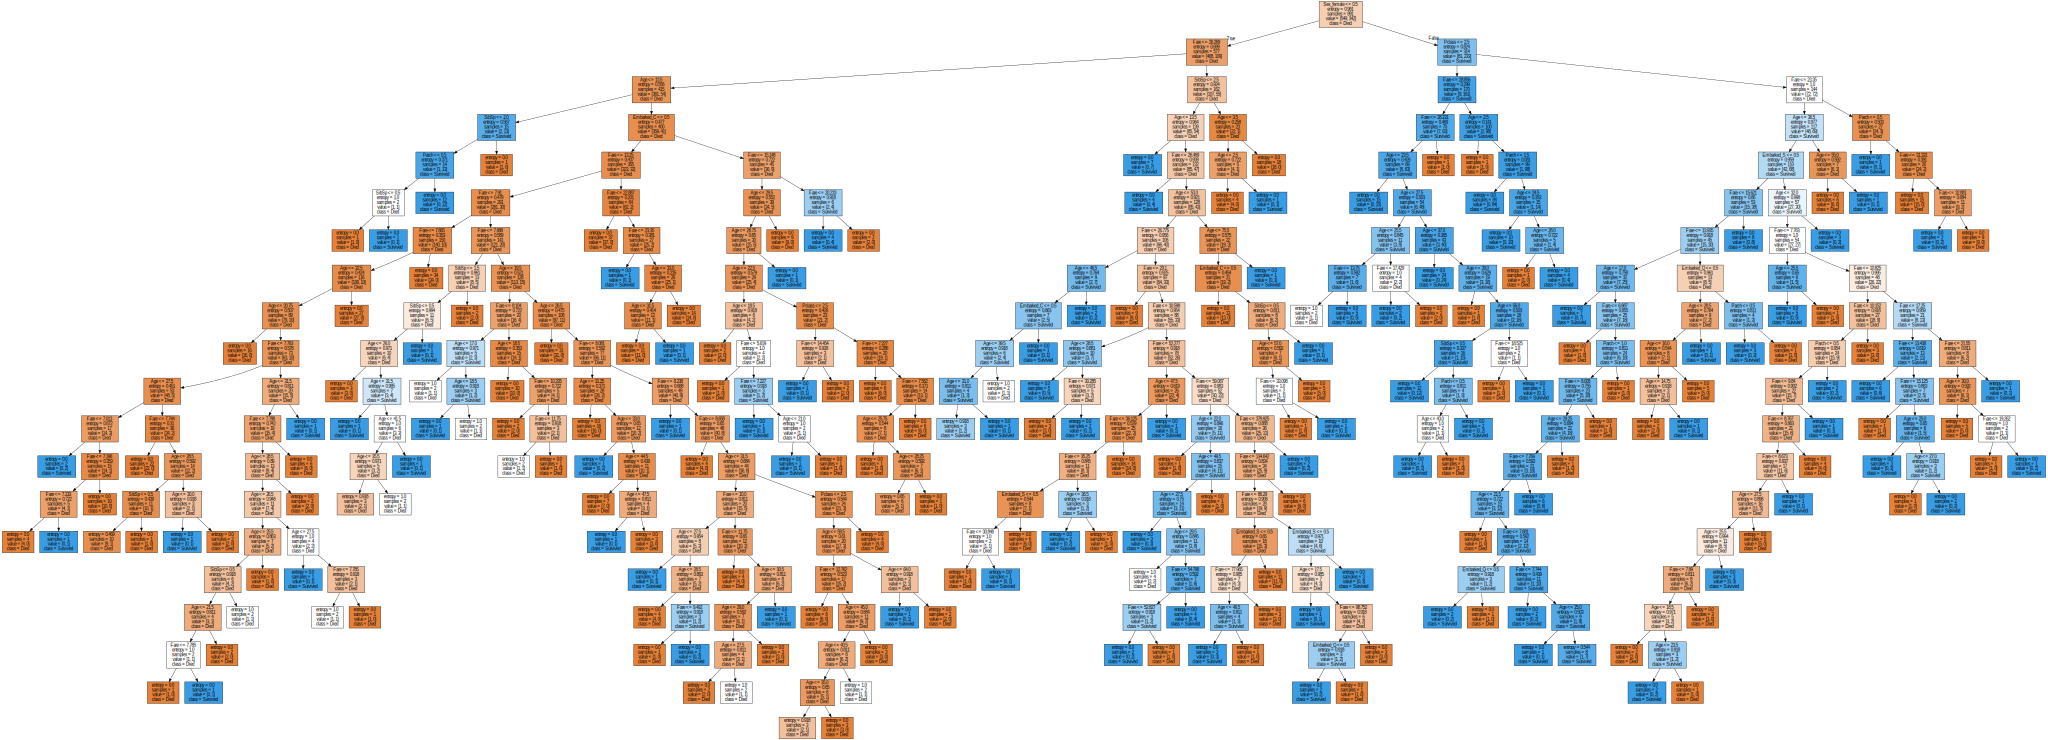

In [134]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [135]:
# determine the number of correct answers of our tree
clf.score(X, y)

0.9797979797979798

In [136]:
# Let's divide the data into the data on which our tree is trained and the data for the test
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [138]:
# train our model with new data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [139]:
# determine the number of correct answers of our tree
clf.score(X_train, y_train)

0.9798657718120806

In [140]:
# Let's check our model on data that the model has not seen
clf.score(X_test, y_test)

0.7864406779661017

In [141]:
# We got a fairly low percentage according to new data. May be due to retraining of the model.

In [142]:
# Limit the depth of the tree. The number 3 was chosen by comparing the percentages of the model definition
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [143]:
# train our model with new data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [144]:
# determine the number of correct answers of our tree
clf.score(X_train, y_train)

0.8238255033557047

In [145]:
# Let's check our model on data that the model has not seen
clf.score(X_test, y_test)

0.8203389830508474

In [146]:
# Let's check our model for different depths
# Let's create a variable that will store the depth range
max_depth_values = range(1, 100)

In [147]:
# Let's create an empty dataframe into which we will write our values
scores_data = pd.DataFrame()

In [148]:
# Let's create a cycle over our range, which will determine the values of correct answers on the training and test data, 
#and record them in our data frame
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [149]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.766102
0,96,0.979866,0.776271
0,97,0.979866,0.772881
0,98,0.979866,0.762712


In [150]:
# we convert column values into rows with measured values, for convenient plotting
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score'],
                          var_name='set_type', value_name='score')

In [151]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.766102
194,96,test_score,0.776271
195,97,test_score,0.772881
196,98,test_score,0.762712


<AxesSubplot:xlabel='max_depth', ylabel='score'>

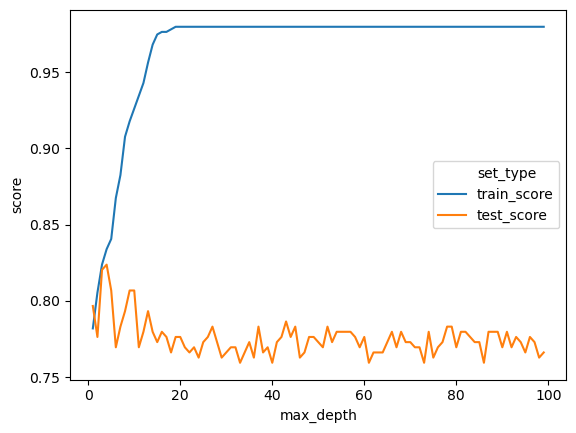

In [152]:
# Let's draw a graph
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [153]:
# Validation
from sklearn.model_selection import cross_val_score

In [154]:
# Let's look at the cross_cal_score function.
# To do this, we will recreate our classifier with a depth of 4 (the depth is chosen just like that)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [155]:
# Let's test the function
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [156]:
# We have obtained the accuracy that our classifier shows

In [157]:
# Let's look at the average accuracy on cross-validation
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.7886274509803922

In [158]:
# After receiving this data, we will recreate our dataframe with a depth range, add new data
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score],
                                   'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [159]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
...,...,...,...,...
0,95,0.979866,0.783051,0.765140
0,96,0.979866,0.759322,0.765126
0,97,0.979866,0.766102,0.768501
0,98,0.979866,0.772881,0.768501


In [160]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [161]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.765140
293,96,cross_val_score,0.765126
294,97,cross_val_score,0.768501
295,98,cross_val_score,0.768501


<AxesSubplot:xlabel='max_depth', ylabel='score'>

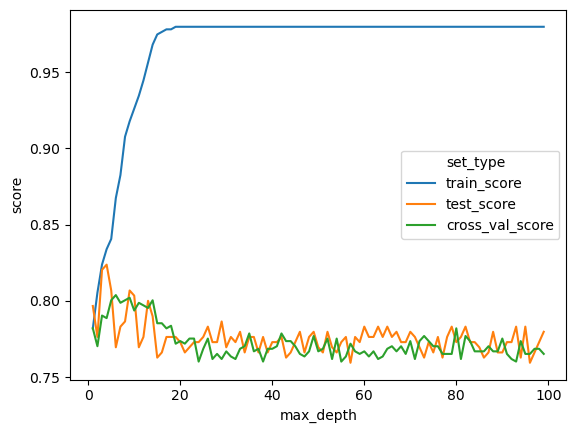

In [162]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [163]:
scores_data_long.query("set_type == 'cross_val_score'").head(10)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.802031
207,10,cross_val_score,0.793627


In [164]:
best_score = scores_data_long.query("set_type == 'cross_val_score'").score.max()

In [165]:
best_score

0.8037535014005602

In [166]:
# Best result at depth = 8

In [167]:
# Let's create a new classifier with the received data
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [168]:
# We will test it on the final data
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.8203389830508474

In [169]:
# Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с 
# глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор 
# (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом 
# датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную 
# визуализацию из предложенных.
# Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)
# np.random.seed(0)
# my_awesome_tree = DecisionTreeClassifier(...)
# или
# my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [170]:
# Create dataframes with training and test data
test_data_set = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
train_data_set = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [171]:
# Determine the data on which we will train and test our tree
X_train = train_data_set.drop(['Unnamed: 0', 'species'], axis=1)
X_test = test_data_set.drop(['Unnamed: 0', 'species'], axis=1)

In [172]:
# We define the variable that we will predict for the training and test models
y_train = train_data_set.species
y_test = test_data_set.species

In [173]:
import numpy as np
rs = np.random.seed(0)

In [174]:
# create an empty dataframe and define a depth range
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)

In [175]:
# Creating a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [176]:
# determine the necessary data for our range and write them to a new dataframe
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    accuracy_scores = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'score' : [train_score], 
                                    'test' : [accuracy_scores]})
    scores_data = scores_data.append(temp_score_data)

In [177]:
scores_data

,max_depth,score,test
0,1,0.70,0.65
0,2,0.96,0.96
0,3,0.98,0.97
0,4,1.00,0.96
0,5,1.00,0.97
...,...,...,...
0,95,1.00,0.97
0,96,1.00,0.97
0,97,1.00,0.96
0,98,1.00,0.97


In [178]:
# we convert column values into rows with measured values, for convenient plotting
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['score', 'test'],
                          var_name='set_type', value_name='scores')

<AxesSubplot:xlabel='max_depth', ylabel='scores'>

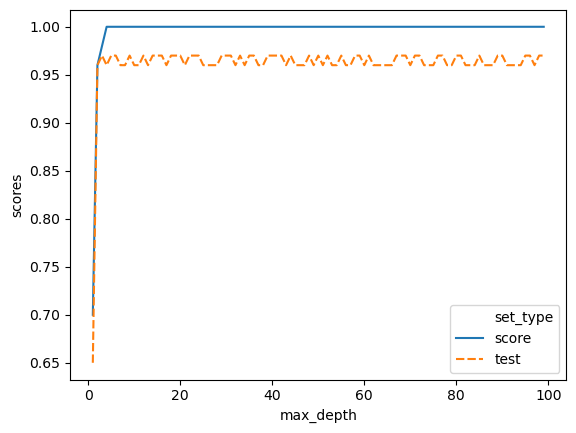

In [179]:
# Let's draw a graph
sns.lineplot(x='max_depth', y = 'scores', hue = 'set_type', data = scores_data_long, style="set_type")

In [ ]:
# Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! 
# Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите 
# какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.
# В задании допускается определённая погрешность.
# P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [181]:
# Reading test data
train_dataset = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [184]:
train_dataset

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [183]:
# Determine the data on which we will train and test our tree
# We define the variable that we will predict for the training and test models
X = train_dataset.drop(['Вид'], axis=1)
y = train_dataset['Вид']

In [186]:
# # Let's divide the data into the data on which our tree is trained and the data for the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [195]:
# # Creating a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [196]:
# Train our tree with training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

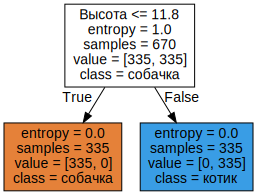

In [198]:
# Visualizing our tree
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['собачка', 'котик'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [197]:
# Checking our tree on test data
clf.score(X_test, y_test)

1.0

In [199]:
# Checking our tree on train data
clf.score(X_train, y_train)
# The result is impressive - 100%

1.0

In [200]:
# Reading data for prediction
test_dataset = pd.read_json(r'dataset_209691_15.txt')

In [210]:
test_dataset

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,33,39.6,1,0,0
1,22,26.4,0,1,0
2,31,37.2,1,1,0
3,33,39.6,1,0,0
4,20,24.0,1,1,0
...,...,...,...,...,...
95,10,4.0,1,0,1
96,7,2.8,1,0,1
97,5,2.0,1,0,1
98,8,3.2,1,0,1


In [202]:
# We determine the data on which we will make a prediction
X_test = test_dataset

In [212]:
# Getting a result
result = clf.predict(X_test)

In [213]:
# Counting the number of dogs
pd.Series(result)[result == 'собачка'].count()

51